# Admission Prediction

Data Set Description

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose(SOP) and (LOR)Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 ) outcome feature to predict
* CGPA - Cumulative Grade Point Average

In [1]:
#import all library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings as w
w.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.tail(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [4]:
df.shape

(400, 9)

In [5]:
df.size

3600

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


# Data Pre-Processing

In [7]:
#checking null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
#we don't want serial number so we drop it
df.drop(['Serial No.'], axis= 1, inplace= True)

df = df.rename(columns = {'Chance of Admit ': 'Chance of Admit'})#rename the column removing space

In [11]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


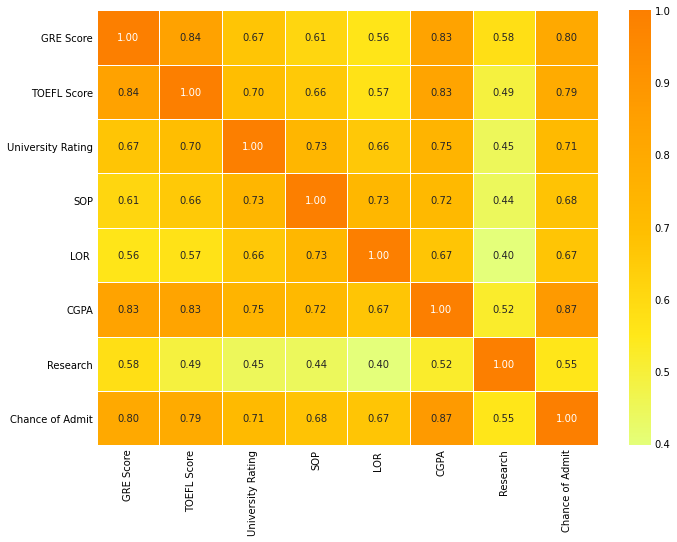

In [13]:
plt.figure(figsize= (10,8))
sns.heatmap(df.corr(), annot= True, cmap= "Wistia", linewidth= .5, fmt= '.2f')
plt.show()

# Data Visualization

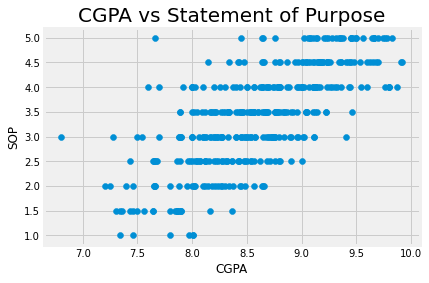

In [14]:
plt.scatter(df['CGPA'], df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("CGPA vs Statement of Purpose", fontsize= 20)
plt.show()

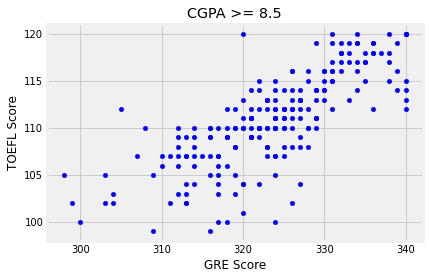

In [15]:
df[df.CGPA >= 8.5].plot(kind= 'scatter', x= 'GRE Score', y = "TOEFL Score", color= "blue")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")
plt.title("CGPA >= 8.5")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Frequency')

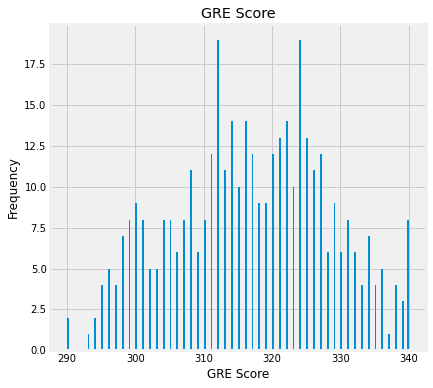

In [16]:
df['GRE Score'].plot(kind= "hist", bins= 200, figsize= (6,6));
plt.title("GRE Score")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

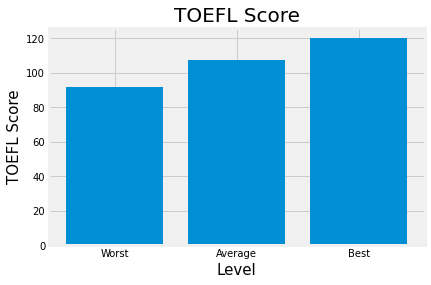

In [17]:
y = np.array([df['TOEFL Score'].min(), df['TOEFL Score'].mean(), df['TOEFL Score'].max()])
x = ['Worst', 'Average', 'Best']
plt.bar(x,y)
plt.xlabel("Level", fontsize=15)
plt.ylabel("TOEFL Score", fontsize=15)
plt.title("TOEFL Score", fontsize=20)
plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

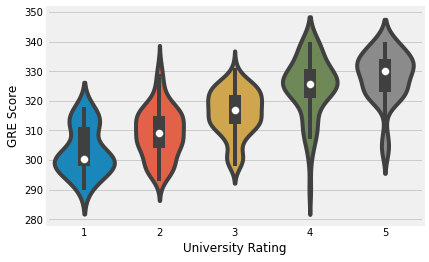

In [18]:
sns.violinplot(x= "University Rating", y= "GRE Score", data= df)

<AxesSubplot:xlabel='University Rating', ylabel='TOEFL Score'>

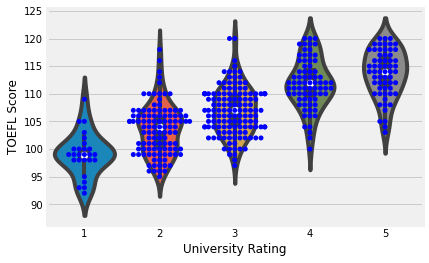

In [19]:
sns.violinplot(x= "University Rating", y= "TOEFL Score", data=df)
sns.swarmplot(x= "University Rating", y= "TOEFL Score", data=df, color= 'blue')

<AxesSubplot:xlabel='University Rating', ylabel='TOEFL Score'>

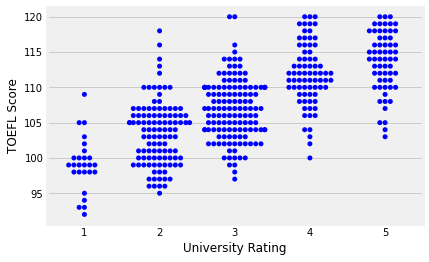

In [20]:
sns.swarmplot(x= "University Rating", y= "TOEFL Score", data=df, color= 'blue')

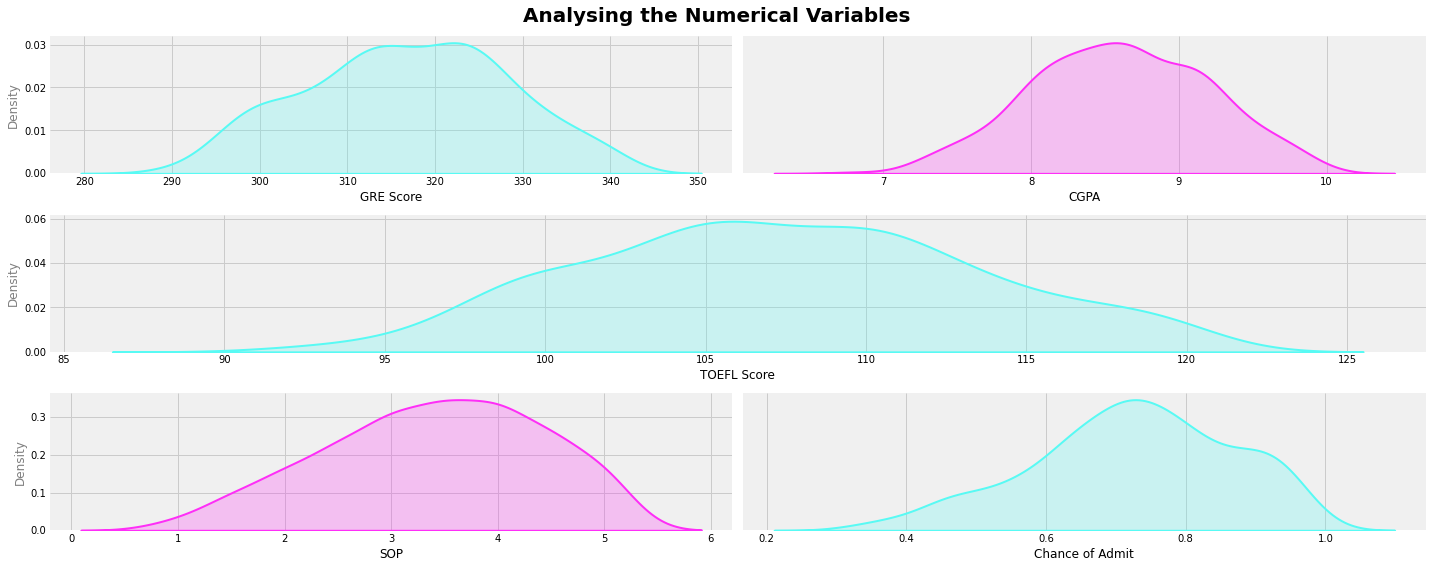

In [21]:
colors = ["#58FAF4", "#FE2EF7"]
fig = plt.figure(figsize= (20,8), tight_layout= True)
plt.suptitle("Analysing the Numerical Variables", size= 20, weight = 'bold')
ax= fig.subplot_mosaic("""AB
                          CC
                          DE""")
sns.kdeplot(df['GRE Score'], ax= ax["A"], color= colors[0], fill=True, linewidth=2)
sns.kdeplot(df['CGPA'], ax=ax['B'], color= colors[1], fill= True, linewidth=2)
sns.kdeplot(df['TOEFL Score'], ax=ax['C'], color=colors[0], fill= True, linewidth= 2)
sns.kdeplot(df['SOP'], ax=ax['D'], color=colors[1], fill=True, linewidth=2)
sns.kdeplot(df['Chance of Admit'], ax= ax['E'], color= colors[0], fill= True, linewidth= 2)

ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)

for s in ['left', 'right', 'top', 'bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

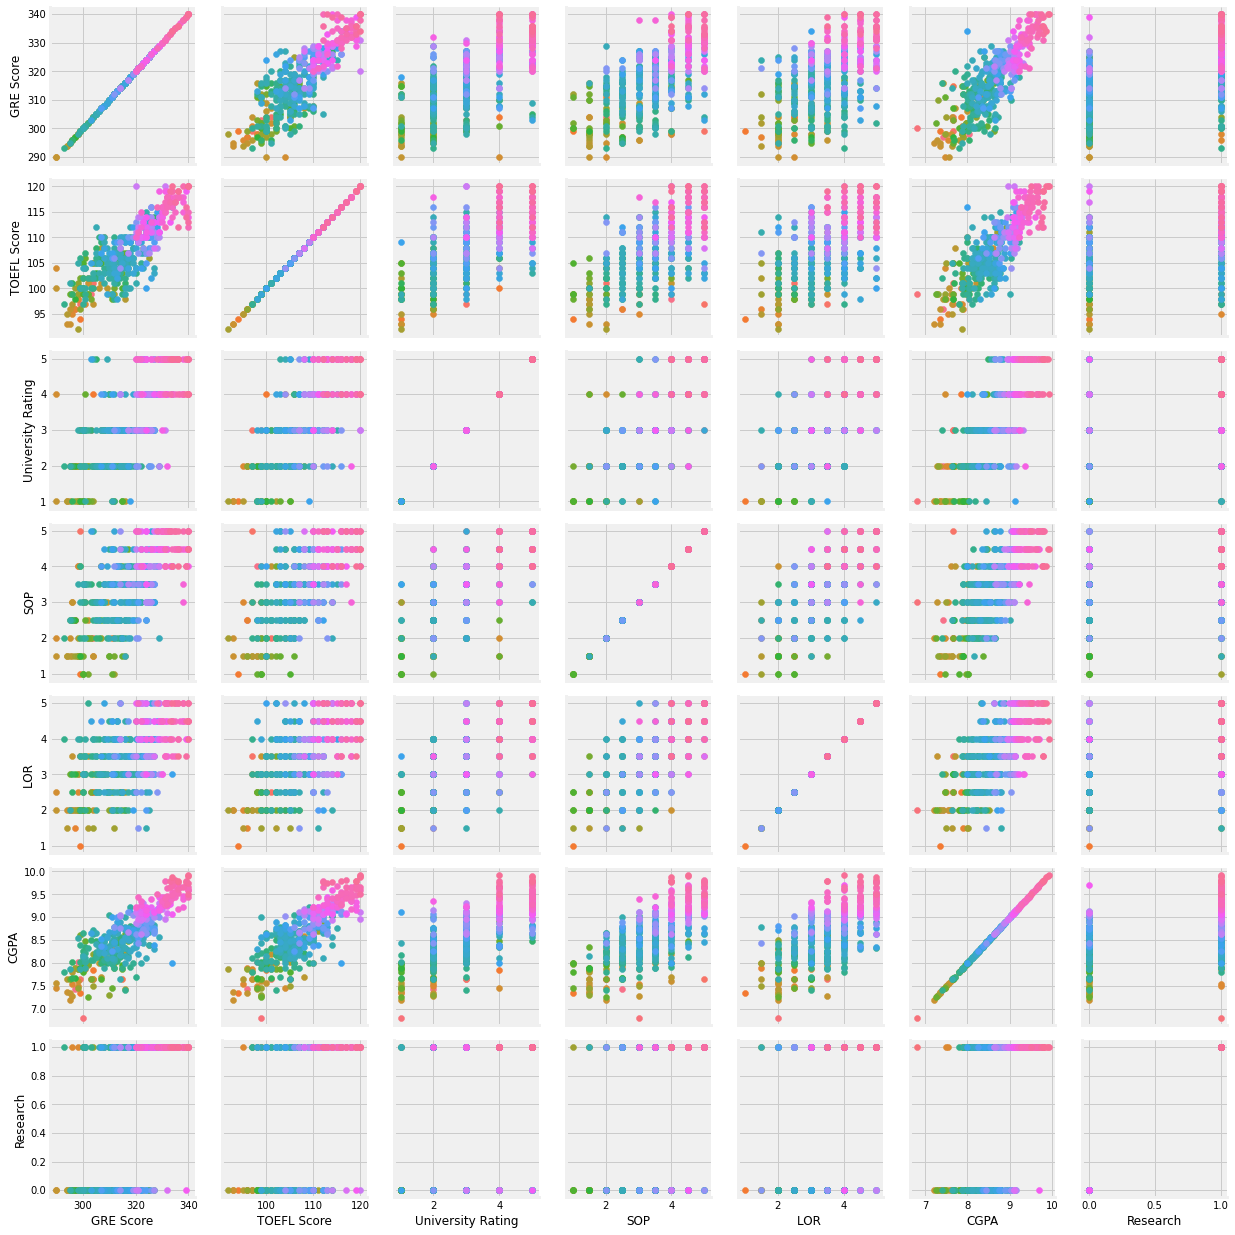

In [22]:
df_p = sns.PairGrid(df, hue= 'Chance of Admit')
df_p.map(plt.scatter)

In [23]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [25]:
df.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

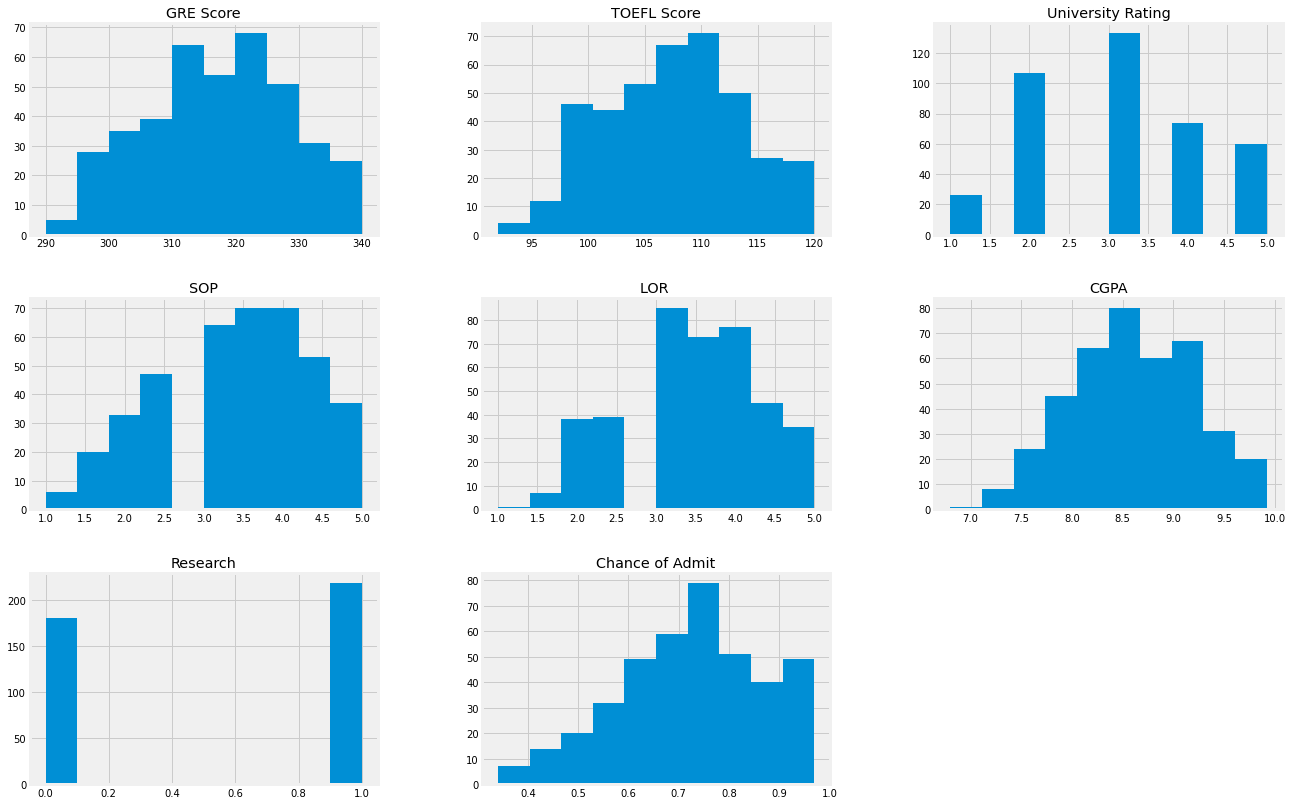

In [26]:
df.hist(figsize=(20,14))
plt.show()

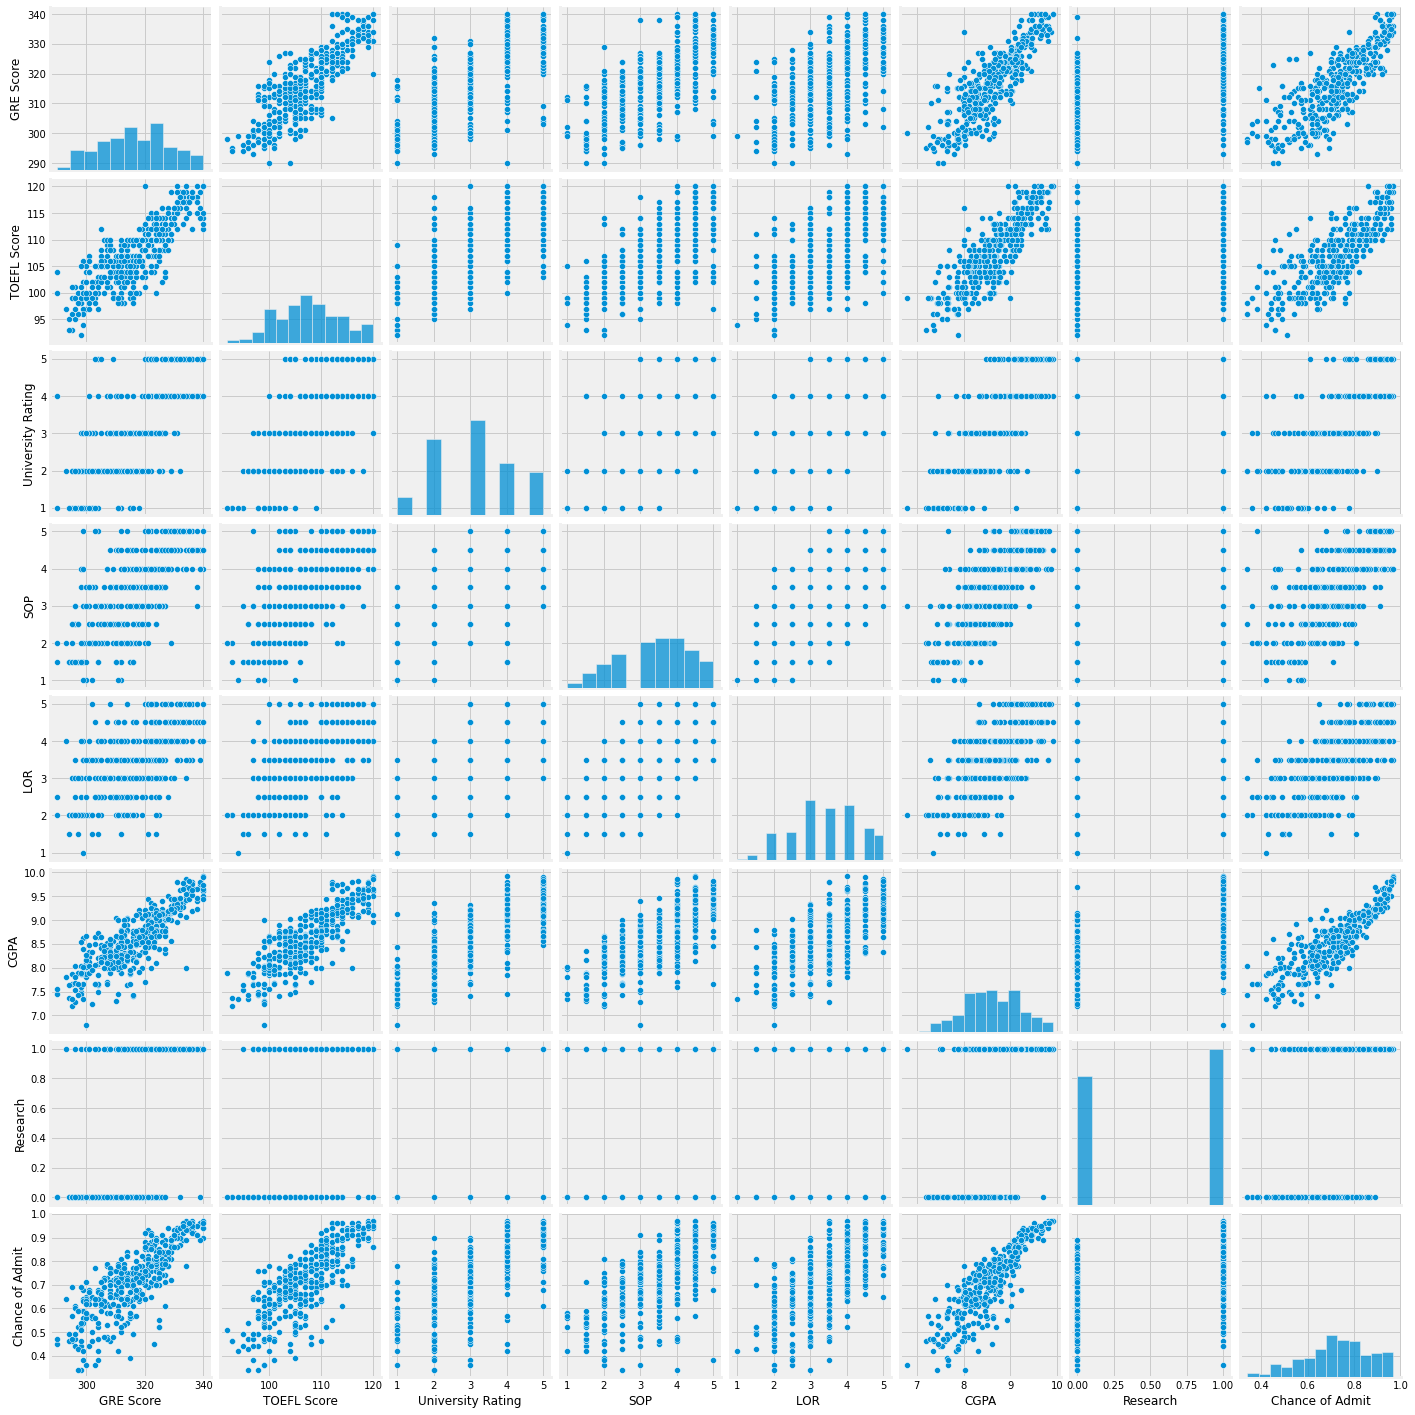

In [27]:
sns.pairplot(data=df)


In [28]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

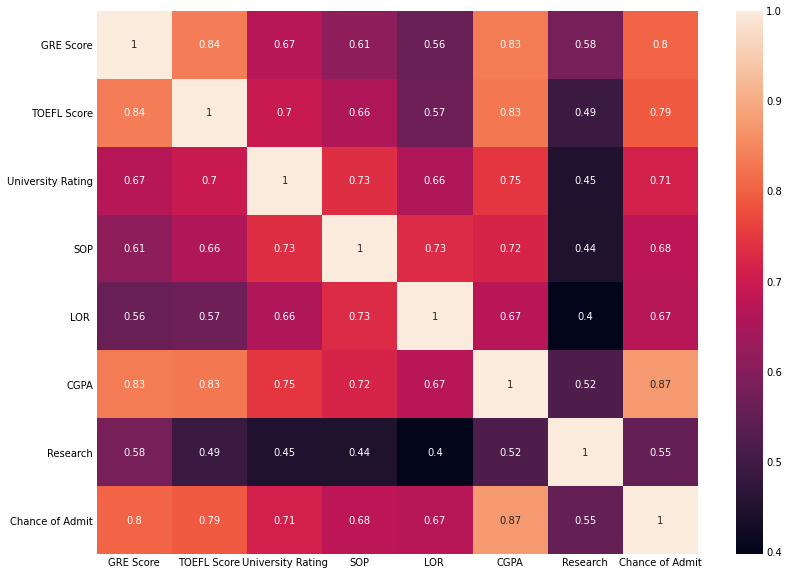

In [29]:
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

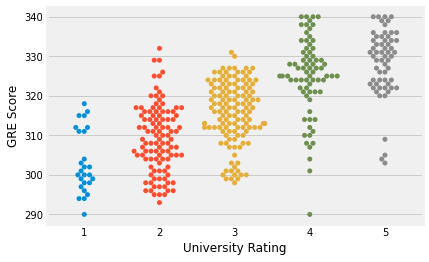

In [30]:
sns.swarmplot(x= "University Rating", y= "GRE Score", data=df)

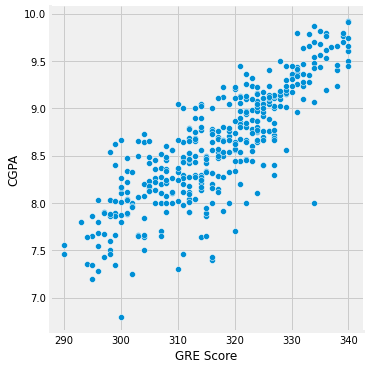

In [31]:
sns.relplot(x= "GRE Score", y = "CGPA", data=df)

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

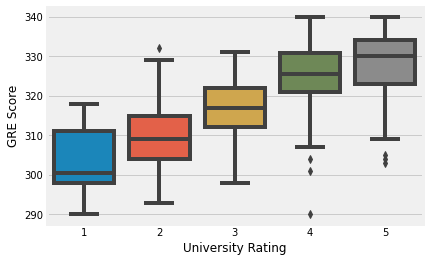

In [32]:
sns.boxplot(x= "University Rating", y = "GRE Score", data= df)

<AxesSubplot:xlabel='TOEFL Score', ylabel='CGPA'>

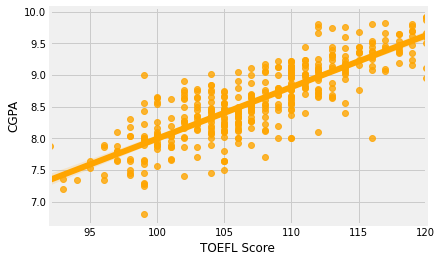

In [33]:
sns.regplot(x="TOEFL Score", y = "CGPA", color= 'orange', data= df)

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

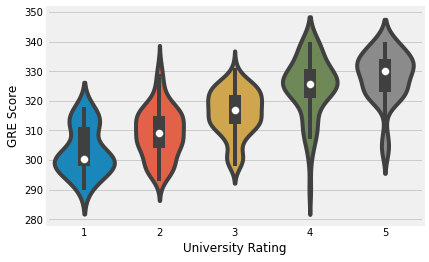

In [34]:
sns.violinplot(x= "University Rating", y= "GRE Score", data= df)

<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

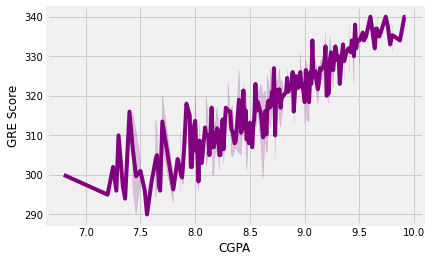

In [35]:
sns.lineplot(x="CGPA", y= "GRE Score", data=df, color= 'purple')

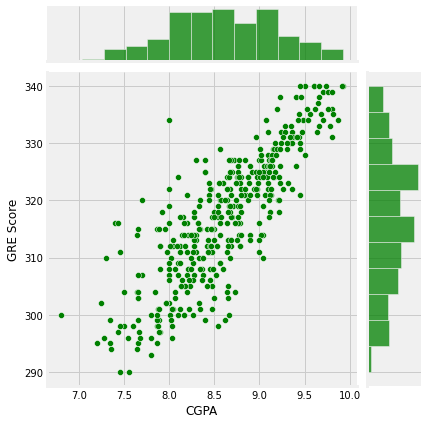

In [36]:
sns.jointplot(x="CGPA", y= "GRE Score", data=df, color= 'g')

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

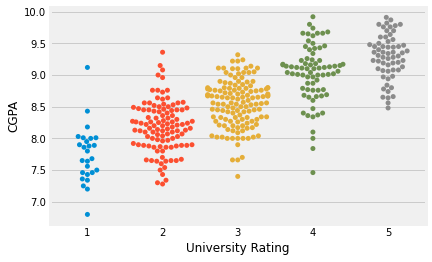

In [37]:
sns.swarmplot(x="University Rating", y= "CGPA", data=df)

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

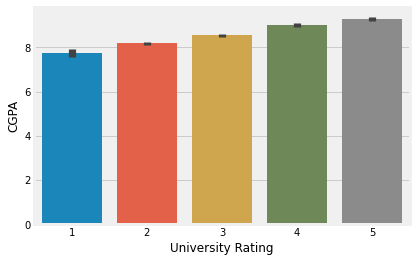

In [38]:
sns.barplot(x= "University Rating", y= "CGPA", data=df)

<AxesSubplot:xlabel='SOP', ylabel='GRE Score'>

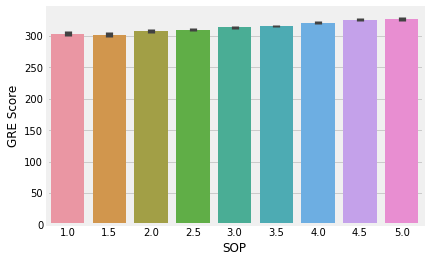

In [39]:
sns.barplot(x= "SOP", y= "GRE Score", data=df)

<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

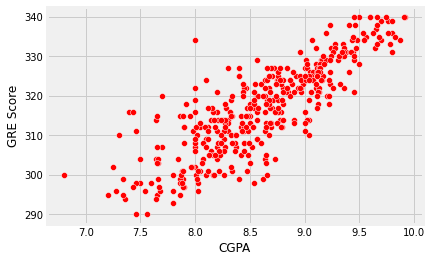

In [40]:
sns.scatterplot(x="CGPA", y= "GRE Score", data=df, color= 'r')

In [42]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

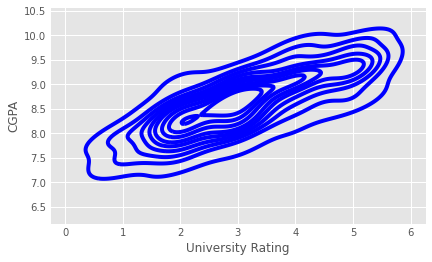

In [44]:
plt.style.use('ggplot')

sns.kdeplot(x= "University Rating", y= "CGPA", data=df, color= 'blue')

In [46]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [47]:
x = df.drop('Chance of Admit', axis= 1)
y = df['Chance of Admit']

In [48]:
from sklearn.linear_model import LassoLars, LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=30, test_size=0.3)

In [50]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

280
280
120
120


In [51]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [55]:
y_pred = lin_reg.predict(x_test)

print(f"r2 Score of Test set : {r2_score(y_test, y_pred)}")

r2 Score of Test set : 0.7895738746939835


In [56]:
lin_reg.intercept_

-1.1593467281438503

In [58]:
lin_reg.coef_

array([0.0020371 , 0.00165095, 0.00287535, 0.00340623, 0.02099978,
       0.11106864, 0.03080435])

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_test, y_pred)

0.004819103134546475

In [62]:
model = LinearRegression(normalize= True)
model.fit(x_test, y_test)
model.score(x_test, y_test)*100

82.72156049366397

In [64]:
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
Ridge()

Ridge()

In [65]:
rid = rid.predict(x_test)

print(f"r2 Score of Test set : {r2_score(y_test, y_pred)}")

r2 Score of Test set : 0.7895738746939835


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_test, y_pred)

0.004819103134546475

In [71]:
rid.score(x_test, y_test)*100

AttributeError: 'numpy.ndarray' object has no attribute 'score'

# LASSO REGRESSION¶
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [72]:
las = Lasso(alpha= 1.0)
las.fit(x_train,y_train)
Lasso()

Lasso()

In [73]:
y_pred = las.predict(x_test)

print(f"r2 Score of the Test set : {r2_score(y_test, y_pred)}")

r2 Score of the Test set : 0.2054986787374471


In [74]:
las.coef_

array([0.00193176, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_test, y_pred)

0.018195382356300086

In [77]:
las.score(x_test, y_test)*100

20.54986787374471

# LEAST ANGLE REGRESSION
In statistics, least-angle regression is an algorithm for fitting linear regression models to high-dimensional data. LassoLars is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients. Lasso model fit with Least Angle Regression a.k.a. Lars.

In [78]:
from sklearn.linear_model import LassoLars
from sklearn.metrics import r2_score

In [79]:
regressor = LassoLars(alpha= 0.1)
regressor.fit(x_train, y_train)

LassoLars(alpha=0.1)

In [80]:
regressor.intercept_

0.7304285714285713

In [81]:
regressor.coef_

array([0., 0., 0., 0., 0., 0., 0.])

In [82]:
y_pred = regressor.predict(x_test)


print(f"r2 Score of the Test set : {r2_score(y_test, y_pred)}")

r2 Score of the Test set : -0.017926436905774112


In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.12185476190476191

In [85]:
mean_absolute_error(y_test, y_pred)

0.12185476190476191